In [1]:
import wfdb
from wfdb import processing
import numpy as np
import pandas as pd
import neurokit2 as nk
import matplotlib.pyplot as plt
import os

ECG_filename = 'c02'
wfdb.dl_files('apnea-ecg/1.0.0/',os.getcwd(),[ECG_filename+'.apn',ECG_filename+'.dat',ECG_filename+'.hea'])
ECG_header = wfdb.rdheader(ECG_filename,pn_dir = 'apnea-ecg/1.0.0/')
ECG = wfdb.rdrecord(ECG_filename)
ECG_signals,ECG_fields = wfdb.rdsamp(ECG_filename)


Resp_filename = 'c02r'
wfdb.dl_files('apnea-ecg/1.0.0/',os.getcwd(),[Resp_filename+'.apn',Resp_filename+'.dat',Resp_filename+'.hea'])

Resp_header = wfdb.rdheader(Resp_filename,pn_dir = 'apnea-ecg/1.0.0/')
Resp = wfdb.io.rdrecord(Resp_filename)
Resp_signals,Resp_fields = wfdb.rdsamp(Resp_filename)
headerList = Resp_fields['sig_name']
annotation = wfdb.rdann(Resp_filename,'apn')
if len(ECG_signals)>= len(Resp_signals):
    length = len(ECG_signals)
else:
    length = len(Resp_signals)


    
annotations = ['']*length

for sample, ann in zip(annotation.sample, annotation.symbol):
    annotations[sample] = ann 


ECG_df = pd.DataFrame(ECG_signals,columns = ['ECG'])
Resp_df = pd.DataFrame(Resp_signals,columns = headerList)
annot_df = pd.DataFrame(annotations,columns = ['Annotations'])
combined = (pd.concat([ECG_df,Resp_df,annot_df],axis = 1)).fillna(0)
combined.to_csv(ECG_filename+".csv",index = False)



NetFileNotFoundError: 404 Error: Not Found for url: https://physionet.org/content/apnea-ecg/1.0.0/1.0.0/

In [2]:
import wfdb
import numpy as np
import pandas as pd
import neurokit2 as nk
import matplotlib.pyplot as plt


ECG_filename = 'c02'
ECG_header = wfdb.rdheader(ECG_filename)
ECG = wfdb.rdrecord(ECG_filename)
ECG_signals,ECG_fields = wfdb.rdsamp(ECG_filename,sampfrom = 0, sampto =30000)
ECG_5min = wfdb.Record(p_signal=ECG_signals[:30000,:],
                       fs=100,
                       units=ECG_header.units,
                       sig_name=ECG_header.sig_name,
                       comments=ECG_header.comments)
annotation = wfdb.rdann(ECG_filename,'apn',sampto=5)
wfdb.plot_wfdb(record = ECG_5min, annotation = annotation, plot_sym = True)

Resp_filename = 'c02r'
Resp_header = wfdb.rdheader(Resp_filename)
Resp = wfdb.io.rdrecord(Resp_filename)
Resp_signals,Resp_fields = wfdb.rdsamp(Resp_filename)

wfdb.plot_wfdb(record = Resp, annotation = annotation, plot_sym = True)

plt.plot(Resp_signals[:,0])
plt.xlim(0, 300)
plt.show()

#wfdb.plot_wfdb(record = Resp_signals_5min, plot_sym = True)

#wfdb.plot_wfdb(record = Resp, annotation = annotation, plot_sym = True)

##signal = np.concatenate(ECG_signals)
##_, rpeaks = nk.ecg_peaks(signal, sampling_rate = 100)
##plot = nk.events_plot(rpeaks['ECG_R_Peaks'], signal)
##plt.show()


stop = False
N_count = 0
tracker = []
section_start = 0
section_end = 0
while stop == False:
    for sample,ann in zip(annotation.sample, annotation.symbol):
        if ann == 'N':
            N_count+=1
            tracker.append(sample)
            print(tracker)
            if N_count ==6:
                section_start = tracker[0]
                section_end = tracker[5]
                stop = True
                print("N = 6")
                break
        else:
            N_count = 0
            tracker = []
            section_start = 0
            section_end = 0

FileNotFoundError: [Errno 2] No such file or directory: '/Users/marianarodrigues/Documents/c02.hea'

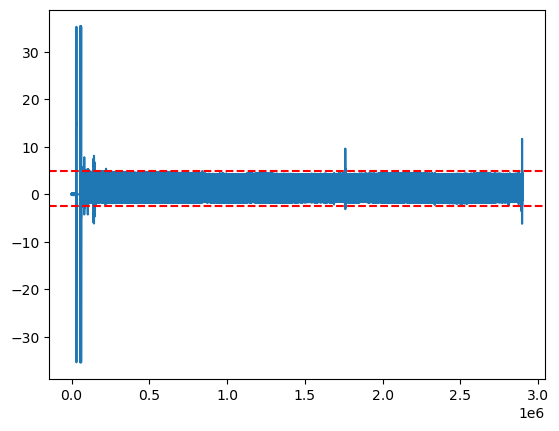

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
import pandas as pd

# Load ECG data
df = pd.read_csv("c01.csv", usecols=["ECG"])
signal = np.concatenate(pd.DataFrame(df).to_numpy())

# Calculate z-score of signal
z_scores = zscore(signal)

# Plot z-scores
plt.plot(z_scores)
plt.axhline(y=5, color="r", linestyle="--")
plt.axhline(y=-2.5, color="r", linestyle="--")
plt.show()


Mean of the clean ECG signal after outlier removal: -0.02637569676700112


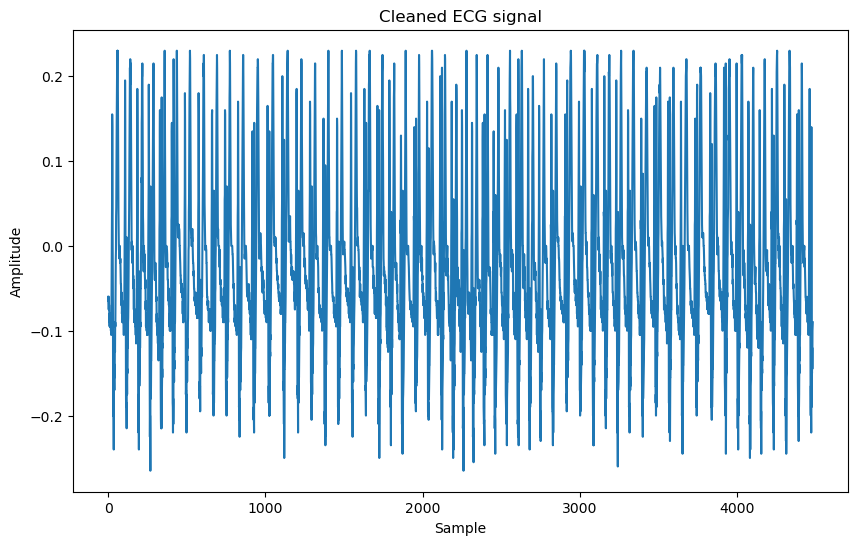

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks
import neurokit2 as nk

# Load ECG data
df = pd.read_csv("a01.csv", usecols=["ECG"])
signal = np.concatenate(pd.DataFrame(df).to_numpy())
section= signal[0:5000]

# Detect outliers using IQR method
q1, q3 = np.percentile(signal, [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = np.where((section < lower_bound) | (section > upper_bound))[0]

# Remove outliers
ecg_clean = np.delete(section, outliers)

# Calculate mean of the clean ECG signal
mean_signal = np.mean(ecg_clean)
print("Mean of the clean ECG signal after outlier removal:", mean_signal)

# Plot the cleaned ECG signal without the outliers
plt.figure(figsize=(10, 6))
plt.plot(ecg_clean)
plt.title("Cleaned ECG signal")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.show()


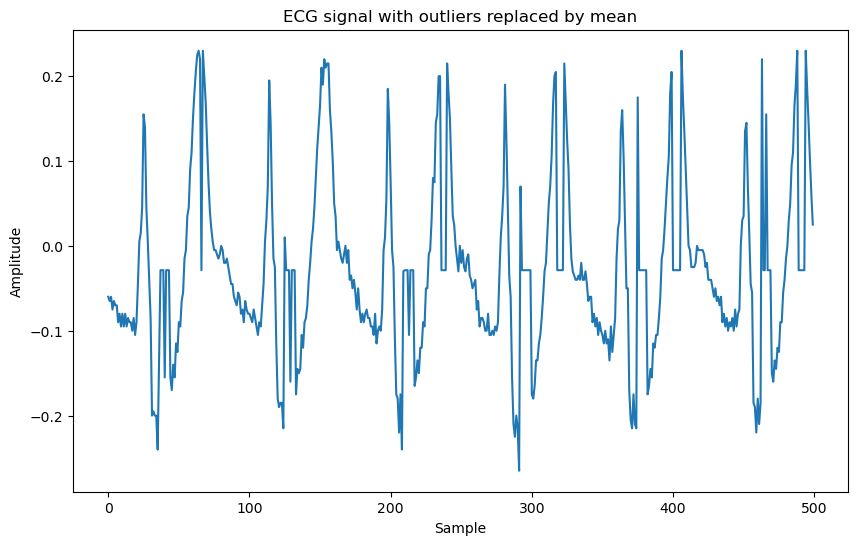

In [35]:
# Load ECG data
df = pd.read_csv("a01.csv", usecols=["ECG"])
signal = np.concatenate(pd.DataFrame(df).to_numpy())
section = signal[0:500]

# Detect outliers using IQR method
q1, q3 = np.percentile(signal, [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = np.where((section < lower_bound) | (section > upper_bound))[0]

# Remove outliers
ecg_clean = np.delete(section, outliers)

# Calculate mean of clean signal
mean_clean = np.mean(ecg_clean)

# Replace outliers with mean value
signal[outliers] = mean_clean

# Plot the modified ECG signal with mean value
plt.figure(figsize=(10, 6))
plt.plot(section)
plt.title("ECG signal with outliers replaced by mean")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.show()


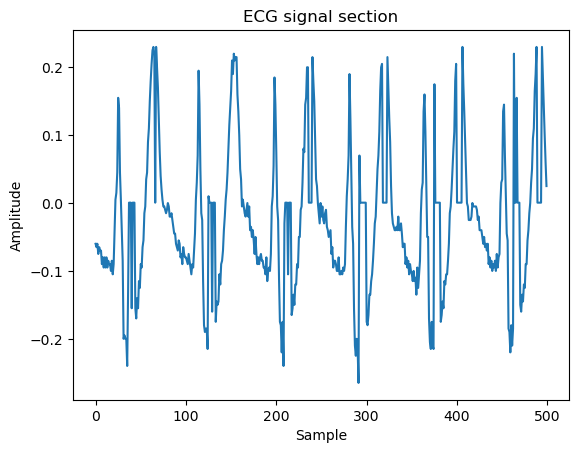

In [36]:
import numpy as np
import pandas as pd

# Load ECG data
df = pd.read_csv("a01.csv")

# Detect outliers using IQR method
q1, q3 = np.percentile(df["ECG"], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = np.where((df["ECG"] < lower_bound) | (df["ECG"] > upper_bound))[0]

# Replace outliers with mean
ecg_mean = np.mean(df["ECG"])
df.loc[outliers, "ECG"] = ecg_mean

# Save the modified DataFrame to a new CSV file
df.to_csv("a01_clean_mean.csv", index=False)

#Plot new signal
df = pd.read_csv("a01_clean_mean.csv", usecols=["ECG"])
signal = np.concatenate(pd.DataFrame(df).to_numpy())
section = signal[0:500]

plt.plot(section)
plt.title("ECG signal section")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.show()


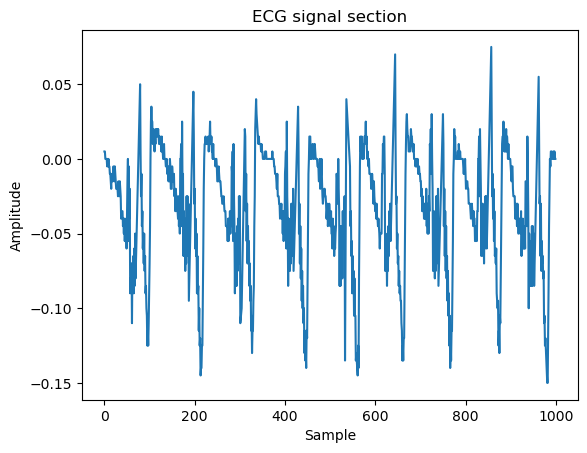

In [46]:
import pandas as pd

# Load CSV file
df = pd.read_csv("c01.csv")

# Detect outliers using IQR method
q1, q3 = np.percentile(df["ECG"], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = np.where((df["ECG"] < lower_bound) | (df["ECG"] > upper_bound))[0]

# Replace outliers with NaN
df.loc[outliers, "ECG"] = np.nan

# Interpolate missing values
df["ECG"] = df["ECG"].interpolate()

# Save interpolated data to a new CSV file
df.to_csv("c01_interpolated_data.csv", index=False)

#Plot new interpolated signal
df = pd.read_csv("c01_interpolated_data.csv", usecols=["ECG"])
signal = np.concatenate(pd.DataFrame(df).to_numpy())
section = signal[115000:116000]

plt.plot(section)
plt.title("ECG signal section")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.show()

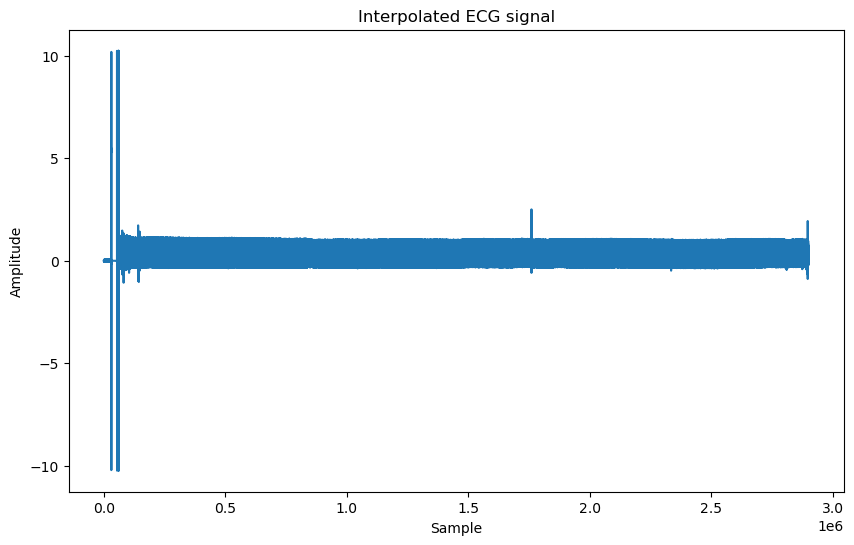

In [51]:
import pandas as pd


def interpolate_outliers(outliers, signal, fs):
    """
    Interpolate outliers in ECG signal using linear interpolation.
    
    Parameters
    ----------
    outliers : list or array-like
        Indices of the outlier samples.
    signal : array-like
        ECG signal.
    fs : int or float
        Sampling frequency.
    
    Returns
    -------
    interpolated_signal : array-like
        Interpolated ECG signal.
    """
    interpolated_signal = signal.copy()
    for i in outliers:
        # Find nearest neighbors
        left_neighbor = i - 1
        right_neighbor = i + 1
        
        # Check if neighbors are within bounds
        if left_neighbor >= 0 and right_neighbor < len(signal):
            # Linear interpolation
            interpolated_value = (signal[right_neighbor] + signal[left_neighbor]) / 2
            interpolated_signal[i] = interpolated_value
    return interpolated_signal
# Load CSV file
df = pd.read_csv("c01.csv")

signal = np.concatenate(pd.DataFrame(df["ECG"]).to_numpy())

fs = 100

# Detect outliers using IQR method
q1, q3 = np.percentile(df["ECG"], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = np.where((df["ECG"] < lower_bound) | (df["ECG"] > upper_bound))[0]

# Interpolate outliers
interpolated_signal = interpolate_outliers(outliers, signal, fs)

# Plot interpolated signal
plt.figure(figsize=(10, 6))
plt.plot(interpolated_signal)
plt.title("Interpolated ECG signal")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.show()

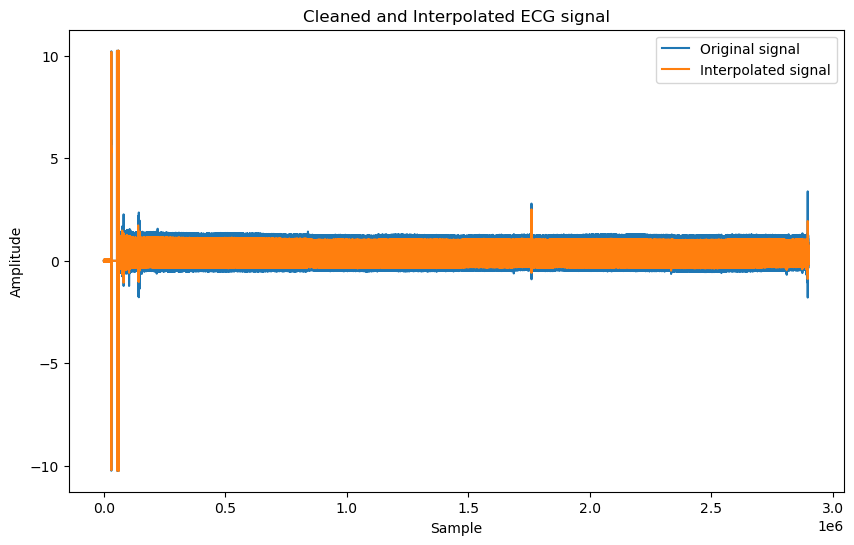

In [53]:
import numpy as np
import pandas as pd

# Define the function to interpolate outliers
def interpolate_outliers(outliers, signal, fs):
    """
    Interpolate outliers in ECG signal using linear interpolation.
    
    Parameters
    ----------
    outliers : list or array-like
        Indices of the outlier samples.
    signal : array-like
        ECG signal.
    fs : int or float
        Sampling frequency.
    
    Returns
    -------
    interpolated_signal : array-like
        Interpolated ECG signal.
    """
    interpolated_signal = signal.copy()
    for i in outliers:
        # Find nearest neighbors
        left_neighbor = i - 1
        right_neighbor = i + 1
        
        # Check if neighbors are within bounds
        if left_neighbor >= 0 and right_neighbor < len(signal):
            # Linear interpolation
            interpolated_value = (signal[right_neighbor] + signal[left_neighbor]) / 2
            interpolated_signal[i] = interpolated_value
    return interpolated_signal

# Load CSV file
df = pd.read_csv("c01.csv")

# Extract ECG signal from dataframe
signal = np.concatenate(pd.DataFrame(df["ECG"]).to_numpy())

# Detect outliers using IQR method
q1, q3 = np.percentile(df["ECG"], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = np.where((df["ECG"] < lower_bound) | (df["ECG"] > upper_bound))[0]

# Interpolate outliers
interpolated_signal = interpolate_outliers(outliers, signal, fs=100)

# Replace outliers with interpolated values
df.loc[outliers, "ECG"] = interpolated_signal[outliers]

# Save the interpolated data to a new CSV file
df.to_csv("c01_interpolated.csv", index=False)

# Plot the cleaned and interpolated ECG signal
plt.figure(figsize=(10, 6))
plt.plot(signal, label="Original signal")
plt.plot(interpolated_signal, label="Interpolated signal")
plt.title("Cleaned and Interpolated ECG signal")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


In [54]:
def interpolate_outliers(outliers, signal, fs):
    """
    Interpolate outliers in ECG signal using linear interpolation.

    Parameters
    ----------
    outliers : list or array-like
        Indices of the outlier samples.
    signal : array-like
        ECG signal.
    fs : int or float
        Sampling frequency.

    Returns
    -------
    interpolated_signal : array-like
        Interpolated ECG signal.
    """
    interpolated_signal = signal.copy()
    for i in outliers:
        # Find nearest neighbors
        left_neighbor = i - 1
        right_neighbor = i + 1

        # Check if neighbors are within bounds
        if left_neighbor >= 0 and right_neighbor < len(signal):
            # Linear interpolation
            time_diff = 1 / fs
            left_time = i * time_diff - time_diff
            right_time = i * time_diff + time_diff
            left_value = signal[left_neighbor]
            right_value = signal[right_neighbor]
            interpolated_value = left_value + ((right_value - left_value) / (right_time - left_time)) * (i * time_diff - left_time)
            interpolated_signal[i] = interpolated_value
    return interpolated_signal


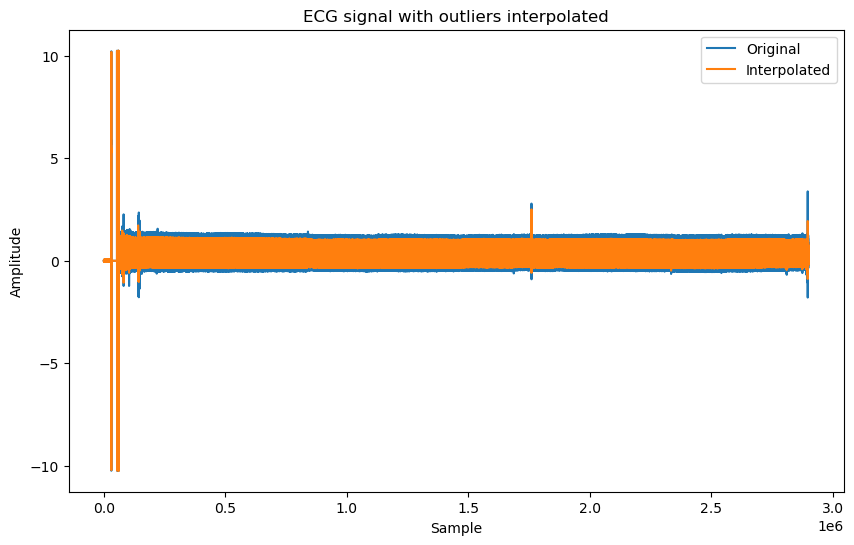

In [55]:
import pandas as pd

# Load CSV file
df = pd.read_csv("c01.csv")

signal = np.concatenate(pd.DataFrame(df["ECG"]).to_numpy())

fs = 100

# Detect outliers using IQR method
q1, q3 = np.percentile(df["ECG"], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = np.where((df["ECG"] < lower_bound) | (df["ECG"] > upper_bound))[0]

# Interpolate outliers
interpolated_signal = interpolate_outliers(outliers, signal, fs)

# Plot the original and interpolated signals
plt.figure(figsize=(10, 6))
plt.plot(signal, label="Original")
plt.plot(interpolated_signal, label="Interpolated")
plt.title("ECG signal with outliers interpolated")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


In [1]:
import os
os.getcwd()

'/Users/marianarodrigues/Documents'